Importing the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
import keras
from keras.layers import Dense,Conv2D,Dropout,BatchNormalization,Activation,Flatten,MaxPool2D,Input,LeakyReLU
from keras.models import Sequential
from keras.activations import relu
from keras.optimizers import Adam,RMSprop,SGD
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from sklearn import svm
from keras.preprocessing import image
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import os
import cv2
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as sk
%matplotlib inline
import h5py
import re

In [2]:
#Import all the libraries required for this project.
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras import layers

In [50]:
import seaborn as sns

In [ ]:
import nltk

In [28]:
from keras.datasets import imdb

Loading the imdb dataset from keras library using 10000 most frequent words:

In [29]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.imdb.load_data(
    path='imdb.npz', num_words=10000
)

17465344/17464789 [==============================] - 1s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
pd.DataFrame(y_train)[0].unique()

array([1, 0])

In [ ]:
np.array(x[1]).shape

(25000,)

In [ ]:
len(x_train[1])

189

In [ ]:
lengths=[]
for i in x_train:
  lengths.append(len(i))

In [ ]:
lengths1=[]
for i in x_test:
  lengths1.append(len(i))

In [ ]:
np.array(lengths).max()

2494

In [ ]:
np.array(lengths1).max()

2315

In [ ]:
x[0]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

Concatenating the train and test sets from the loaded dataset:

In [30]:
data = np.concatenate((x_train, x_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

Obtaining values of sample input and output:
It can be seen that the input is an encoded sequence of the sentence while the label either has 0 or 1 value.

In [54]:
data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [55]:
targets[0]

1

Checking the count of labels:
The labels are equally distributed in the dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


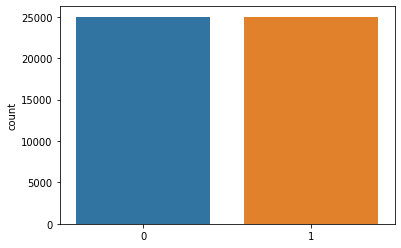

In [52]:
sns.countplot(targets)

Decoding a few encoded inputs to obtain the actual sentences:

In [124]:
for j in range(10,15):
  index = imdb.get_word_index()
  reverse_index = dict([(value, key) for (key, value) in index.items()]) 
  decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[j]] )
  print(decoded) 

# french horror cinema has seen something of a revival over the last couple of years with great films such as inside and # romance # on to the scene # # the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made # was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is # by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named # sent to prison for fraud he is put in a cell with three others the quietly insane # body building # marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old # after # part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black magi

Vectorizing the input data:
The positions of the vectorized array equal to the sequence value are set to 1 while the rest are set to 0.

In [31]:
def vectorize(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
 
data1 = vectorize(data)
targets1 = np.array(targets).astype("float32")

Obtaining the shape of the vectorized data and targets:

In [58]:
data1.shape

(50000, 10000)

In [59]:
targets1.shape

(50000,)

In [56]:
data1[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [57]:
targets1[0]

1.0

Splitting the dataset into train and test sets respectively:

In [60]:
test_input=data[:10000]

In [32]:
test_x = data1[:10000]
test_y = targets1[:10000]
train_x = data1[10000:]
train_y = targets1[10000:]

In [ ]:
max_review = 2000
x_train1 = sequence.pad_sequences(x_train, maxlen=max_review)
x_test1 = sequence.pad_sequences(x_test, maxlen=max_review)

Defining a dense neural network to train the model:

In [33]:
model1 = Sequential()
model1.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model1.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model1.add(layers.Dense(50, activation = "relu"))
model1.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model1.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model1.add(layers.Dense(1, activation = "sigmoid"))#model.summary()
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                500050    
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 505,201
Trainable params: 505,201
Non-trainable params: 0
__________________________________________________

In [34]:
model1.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)

Fitting the model:

In [35]:
results = model1.fit(
 train_x, train_y,
 epochs= 10,
 batch_size = 500,
 validation_data = (test_x, test_y),use_multiprocessing=True
)

Epoch 1/10
80/80 [==============================] - 15s 23ms/step - loss: 0.5352 - accuracy: 0.7229 - val_loss: 0.2646 - val_accuracy: 0.8923
Epoch 2/10
80/80 [==============================] - 1s 13ms/step - loss: 0.2129 - accuracy: 0.9203 - val_loss: 0.2594 - val_accuracy: 0.8980
Epoch 3/10
80/80 [==============================] - 1s 13ms/step - loss: 0.1484 - accuracy: 0.9463 - val_loss: 0.2969 - val_accuracy: 0.8915
Epoch 4/10
80/80 [==============================] - 1s 13ms/step - loss: 0.1039 - accuracy: 0.9640 - val_loss: 0.3540 - val_accuracy: 0.8869
Epoch 5/10
80/80 [==============================] - 1s 13ms/step - loss: 0.0675 - accuracy: 0.9773 - val_loss: 0.3994 - val_accuracy: 0.8862
Epoch 6/10
80/80 [==============================] - 1s 13ms/step - loss: 0.0500 - accuracy: 0.9836 - val_loss: 0.4504 - val_accuracy: 0.8831
Epoch 7/10
80/80 [==============================] - 1s 13ms/step - loss: 0.0419 - accuracy: 0.9851 - val_loss: 0.4950 - val_accuracy: 0.8835
Epoch 8/10
8

Predicting a sample using the trained model:

In [37]:
test_x.shape

(10000, 10000)

In [49]:
test_x[100]

array([0., 1., 1., ..., 0., 0., 0.])

Obtaining the decoded input to get the sentence:

In [61]:

index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in test_input[150]] )
print(decoded) 

1654784/1641221 [==============================] - 0s 0us/step
# and this is a very disturbing film i may be wrong but this is the last film where i considered burt reynolds an actual actor who transformed the role and delivered a message br br jon voight and ned beatty are also excellent they are # and unaware # wanting to enjoy the country little did they know what would happen next br br the photography and sets are realistic and natural this was before the days of wes craven br br what is most disturbing about this film is the fact that places like this still exist in america country folk still # city people it is almost a century and a half since the civil war br br you will enjoy this film it was filmed in the rural sections of south georgia which still exist just don't drive past that to mobile # that area still has not been # since # # 10 10


In [46]:
y_pred=int(model1.predict(test_x[100].reshape(1,10000)))

In [47]:
y_pred

0

In [48]:
test_y[100]

0.0

Using the LSTM network:

In [ ]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(10000, embedding_vector_length, input_length=2000))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               53200     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 373,301
Trainable params: 373,301
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
x_val,x_test2,y_val,y_test1=train_test_split(x_test1,y_test,test_size=0.2,random_state=42)

In [ ]:
model.fit(x_train1, y_train, epochs=5, batch_size=64,validation_data=(x_val,y_val))

Epoch 1/5
391/391 [==============================] - 895s 2s/step - loss: 0.5626 - accuracy: 0.6856 - val_loss: 0.3333 - val_accuracy: 0.8600
Epoch 2/5
391/391 [==============================] - 870s 2s/step - loss: 0.2681 - accuracy: 0.8953 - val_loss: 0.3124 - val_accuracy: 0.8741
Epoch 3/5
391/391 [==============================] - 871s 2s/step - loss: 0.1984 - accuracy: 0.9280 - val_loss: 0.3298 - val_accuracy: 0.8698
Epoch 4/5
391/391 [==============================] - 870s 2s/step - loss: 0.1576 - accuracy: 0.9423 - val_loss: 0.4031 - val_accuracy: 0.8601
Epoch 5/5
391/391 [==============================] - 869s 2s/step - loss: 0.1533 - accuracy: 0.9437 - val_loss: 0.3904 - val_accuracy: 0.8327


In [ ]:
model.evaluate(x_test2,y_test1)

157/157 [==============================] - 42s 270ms/step - loss: 0.3854 - accuracy: 0.8340


[0.3854481875896454, 0.8339999914169312]

In [114]:
maxlen = 300
x = pad_sequences(data, maxlen = maxlen, padding = 'pre')

Obtaining the shape of the padded sequences:

In [124]:
x.shape

(50000, 300)

In [115]:

x_train, x_test, y_train, y_test = train_test_split(x, targets, test_size = 0.2, random_state =42)

Adding convolution layers to the LSTM network:

In [116]:
model = Sequential()
model.add(Embedding(vocab_size, 256, input_length = maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(256, 5, padding = 'same', activation = 'relu', strides = 1))
model.add(Conv1D(128, 5, padding = 'same', activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size = 2))
model.add(Conv1D(64, 5, padding = 'same', activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size = 2))
model.add(LSTM(75))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 300, 256)          7592192   
_________________________________________________________________
dropout_23 (Dropout)         (None, 300, 256)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 300, 256)          327936    
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 300, 128)          163968    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 150, 128)          0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 150, 64)           41024     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 75, 64)          

In [117]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 3, batch_size = 64, verbose = True, use_multiprocessing=True)

Epoch 1/3
625/625 [==============================] - 62s 97ms/step - loss: 0.4356 - accuracy: 0.7668 - val_loss: 0.2539 - val_accuracy: 0.9023
Epoch 2/3
625/625 [==============================] - 60s 95ms/step - loss: 0.1842 - accuracy: 0.9305 - val_loss: 0.2379 - val_accuracy: 0.9036
Epoch 3/3
625/625 [==============================] - 59s 95ms/step - loss: 0.1206 - accuracy: 0.9600 - val_loss: 0.2664 - val_accuracy: 0.8955


As seen above, the addition of convolution layers has helped improve the accuracy of the LSTM network significantly.

Predicting on a sample input:

In [121]:
y_pred=int(model.predict(x_test[150].reshape(1,300)))

In [122]:
y_test[150]

0

In [123]:
y_pred

0

Using the Bidirectional LSTM network:

In [ ]:
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(10000, 128)(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
# Add a classifier
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         98816     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 1,477,761
Trainable params: 1,477,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train1, y_train, batch_size=32, epochs=2, validation_data=(x_val, y_val),use_multiprocessing=True)

Epoch 1/2
782/782 [==============================] - 314s 370ms/step - loss: 0.4920 - accuracy: 0.7447 - val_loss: 0.5107 - val_accuracy: 0.7324
Epoch 2/2
782/782 [==============================] - 288s 368ms/step - loss: 0.3652 - accuracy: 0.8295 - val_loss: 0.3440 - val_accuracy: 0.8606


As seen above the bidirectional LSTM performs better than the normal LSTM network.

In [3]:
!gdown https://drive.google.com/u/0/uc?id=1TXOsasFirro61b7ql1OXKaK_xvidFNyO&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1TXOsasFirro61b7ql1OXKaK_xvidFNyO
To: /content/glove.6B.zip
862MB [00:13, 63.1MB/s]


In [4]:
!unzip '/content/glove.6B.zip'

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [5]:
!gdown https://drive.google.com/u/0/uc?id=1LWVnOp1rw4g9SYswuf8IPAHBoOnWOTF0&export=download

Downloading...
From: https://drive.google.com/u/0/uc?id=1LWVnOp1rw4g9SYswuf8IPAHBoOnWOTF0
To: /content/Sarcasm_Headlines_Dataset.json
5.62MB [00:00, 21.2MB/s]


Reading the json file and storing it as a dataframe:

In [128]:
raw_df = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)


In [ ]:
raw_df

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [129]:
raw_df.dtypes

article_link    object
headline        object
is_sarcastic     int64
dtype: object

In [106]:
raw_df['website_name'] = raw_df['article_link'].str.extract('(https://.*?[.]comhttp/'
                                                            '|https://.*?[.]com)', expand=True)

In [ ]:
raw_df

,article_link,headline,is_sarcastic,website_name
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,https://www.huffingtonpost.com
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,https://www.huffingtonpost.com
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,https://local.theonion.com
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,https://politics.theonion.com
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,https://www.huffingtonpost.com
...,...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0,https://www.huffingtonpost.com
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0,https://www.huffingtonpost.com
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0,https://www.huffingtonpost.com
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0,https://www.huffingtonpost.com


In [107]:
raw_df['website_name'] = raw_df['website_name'].str.replace('https://','').str.replace('/','').str.replace('comhttp','com')


In [13]:
raw_df

,article_link,headline,is_sarcastic,website_name
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,www.huffingtonpost.com
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,www.huffingtonpost.com
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,local.theonion.com
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,politics.theonion.com
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,www.huffingtonpost.com
...,...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0,www.huffingtonpost.com
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0,www.huffingtonpost.com
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0,www.huffingtonpost.com
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0,www.huffingtonpost.com


In [108]:
raw_df = raw_df.drop(['article_link'], axis=1)


Adding length of each sentence to a separate column in the dataframe:

In [10]:
raw_df['headline_length'] = raw_df['headline'].apply(lambda x: len(x.split())) 

In [16]:
raw_df

,headline,is_sarcastic,website_name,headline_length
0,former versace store clerk sues over secret 'b...,0,www.huffingtonpost.com,12
1,the 'roseanne' revival catches up to our thorn...,0,www.huffingtonpost.com,14
2,mom starting to fear son's web series closest ...,1,local.theonion.com,14
3,"boehner just wants wife to listen, not come up...",1,politics.theonion.com,13
4,j.k. rowling wishes snape happy birthday in th...,0,www.huffingtonpost.com,11
...,...,...,...,...
26704,american politics in moral free-fall,0,www.huffingtonpost.com,5
26705,america's best 20 hikes,0,www.huffingtonpost.com,4
26706,reparations and obama,0,www.huffingtonpost.com,3
26707,israeli ban targeting boycott supporters raise...,0,www.huffingtonpost.com,8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

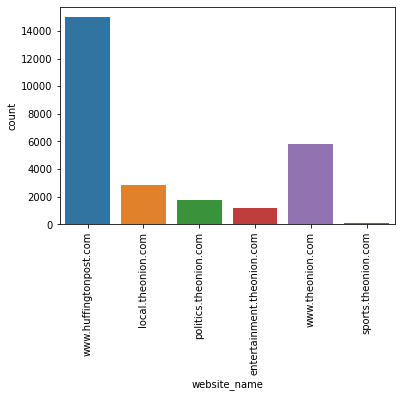

In [100]:
sns.countplot(raw_df['website_name'])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

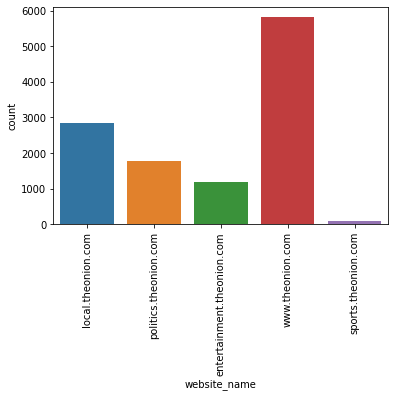

In [112]:
sns.countplot(raw_df[raw_df['is_sarcastic']==1]['website_name'])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0]), <a list of 1 Text major ticklabel objects>)

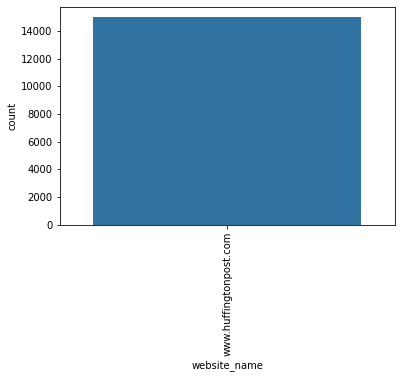

In [113]:
sns.countplot(raw_df[raw_df['is_sarcastic']==0]['website_name'])
plt.xticks(rotation=90)

In [ ]:
As seen above,all huffington posts are not sarcastic while the onion posts are all sarcastic.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


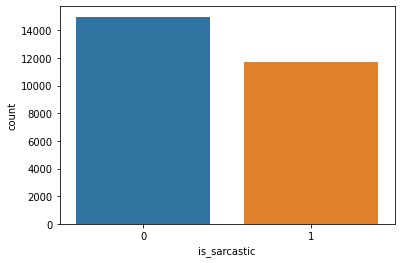

In [53]:
sns.countplot(raw_df['is_sarcastic'])

Obtaining the histogram plot of the sentence lengths:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


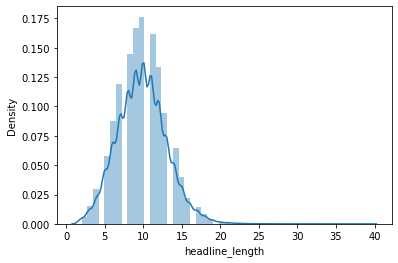

In [19]:
sns.distplot(raw_df['headline_length'])

In [20]:
raw_df['headline_length'].describe()


count    26709.000000
mean         9.845820
std          3.168955
min          2.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         39.000000
Name: headline_length, dtype: float64

It can be seen that the average length of the sentences is around 10 words.

Dropping the irrelevant columns:


In [101]:
raw_df=raw_df.drop(columns=['website_name','headline_length'])

In [11]:
sentences=raw_df['headline']
labels=raw_df['is_sarcastic']

Using tokenizer using out of vocabulary tokens:

In [ ]:
vocab_size = 10000
oov_tok = "<oov>"
# Fit the tokenizer on Training data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(sentences)

Setting the input to a fixed size of 100 using sequences padding:

In [ ]:
word_index = tokenizer.word_index
# Setting the padding properties
max_length = 100
trunc_type='post'
padding_type='post'
# Creating padded sequences from train and test data
sequences = tokenizer.texts_to_sequences(sentences)
sequences_padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(sequences_padded,labels,test_size=0.25,random_state=42)

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Using sequential neural network to train the inputs:
The dimension of the embeddings provided to the network is 16.

In [ ]:
embedding_dim = 16
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 30
history = model.fit(np.array(x_train), np.array(y_train), epochs=num_epochs, validation_data=(np.array(x_test), np.array(y_test)), verbose=1)

Epoch 1/30
626/626 [==============================] - 4s 5ms/step - loss: 0.6707 - accuracy: 0.5765 - val_loss: 0.6094 - val_accuracy: 0.6334
Epoch 2/30
626/626 [==============================] - 3s 5ms/step - loss: 0.4521 - accuracy: 0.8229 - val_loss: 0.3896 - val_accuracy: 0.8329
Epoch 3/30
626/626 [==============================] - 3s 5ms/step - loss: 0.3203 - accuracy: 0.8743 - val_loss: 0.3443 - val_accuracy: 0.8535
Epoch 4/30
626/626 [==============================] - 3s 5ms/step - loss: 0.2689 - accuracy: 0.8955 - val_loss: 0.3484 - val_accuracy: 0.8453
Epoch 5/30
626/626 [==============================] - 3s 5ms/step - loss: 0.2339 - accuracy: 0.9089 - val_loss: 0.3291 - val_accuracy: 0.8582
Epoch 6/30
626/626 [==============================] - 3s 5ms/step - loss: 0.2080 - accuracy: 0.9210 - val_loss: 0.3327 - val_accuracy: 0.8607
Epoch 7/30
626/626 [==============================] - 3s 5ms/step - loss: 0.1860 - accuracy: 0.9313 - val_loss: 0.3396 - val_accuracy: 0.8610
Epoch 

In [ ]:
model.evaluate(np.array(x_test),np.array(y_test))

209/209 [==============================] - 0s 2ms/step - loss: 0.9728 - accuracy: 0.8179


[0.9727509617805481, 0.8179095387458801]

In [ ]:
history = model.fit(np.array(x_train), np.array(y_train), epochs=10, validation_data=(np.array(x_test), np.array(y_test)), verbose=1)

Epoch 1/10
626/626 [==============================] - 4s 5ms/step - loss: 0.6677 - accuracy: 0.5826 - val_loss: 0.5886 - val_accuracy: 0.7236
Epoch 2/10
626/626 [==============================] - 3s 5ms/step - loss: 0.4366 - accuracy: 0.8289 - val_loss: 0.4094 - val_accuracy: 0.8073
Epoch 3/10
626/626 [==============================] - 3s 5ms/step - loss: 0.3163 - accuracy: 0.8738 - val_loss: 0.3486 - val_accuracy: 0.8506
Epoch 4/10
626/626 [==============================] - 3s 5ms/step - loss: 0.2671 - accuracy: 0.8960 - val_loss: 0.3325 - val_accuracy: 0.8570
Epoch 5/10
626/626 [==============================] - 3s 5ms/step - loss: 0.2319 - accuracy: 0.9114 - val_loss: 0.3307 - val_accuracy: 0.8571
Epoch 6/10
626/626 [==============================] - 3s 5ms/step - loss: 0.2064 - accuracy: 0.9221 - val_loss: 0.3547 - val_accuracy: 0.8470
Epoch 7/10
626/626 [==============================] - 3s 5ms/step - loss: 0.1857 - accuracy: 0.9309 - val_loss: 0.3448 - val_accuracy: 0.8553
Epoch 

In [ ]:
model.evaluate(np.array(x_test),np.array(y_test))

209/209 [==============================] - 0s 2ms/step - loss: 0.3834 - accuracy: 0.8570


[0.38336774706840515, 0.8569931387901306]

Using transformer network:

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 15.1 MB/s 
     |████████████████████████████████| 3.3 MB 65.6 MB/s 
     |████████████████████████████████| 636 kB 66.5 MB/s 
     |████████████████████████████████| 895 kB 73.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import TFBertModel, BertTokenizer

Using bert tokenizer:

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME,do_lower_case = True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Encoding the input sentences:

In [ ]:
def encoder(sentences):
  ids = []
  for sentence in sentences:
    encoding = tokenizer.encode_plus(
    sentence,
    max_length=16,
    truncation = True,
    add_special_tokens=True,
    return_token_type_ids=False,
    pad_to_max_length=True,
    return_attention_mask=False)
    ids.append(encoding['input_ids'])
  return ids

In [ ]:
sent_ids = encoder(sentences)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2190: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(sent_ids,labels,test_size=0.2,random_state=42)

In [ ]:
train_ids = tf.convert_to_tensor(x_train)
test_ids = tf.convert_to_tensor(x_test)
test_labels = tf.convert_to_tensor(y_test)
train_labels = tf.convert_to_tensor(y_train)

Using the pretrained bert model:

In [ ]:
bert_encoder = TFBertModel.from_pretrained('bert-base-uncased')
input_word_ids = tf.keras.Input(shape=(16,), dtype=tf.int32, name="input_word_ids")  
embedding = bert_encoder([input_word_ids])
dense = tf.keras.layers.Lambda(lambda seq: seq[:, 0, :])(embedding[0])
dense = tf.keras.layers.Dense(128, activation='relu')(dense)
dense = tf.keras.layers.Dropout(0.2)(dense)   
output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)    

model = tf.keras.Model(inputs=[input_word_ids], outputs=output)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model.compile(tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_word_ids (InputLayer)  [(None, 16)]              0         
_________________________________________________________________
tf_bert_model_1 (TFBertModel TFBaseModelOutputWithPool 109482240 
_________________________________________________________________
lambda_1 (Lambda)            (None, 768)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               98432     
_________________________________________________________________
dropout_75 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 109,580,801
Trainable params: 109,580,801
Non-trainable params: 0
_____________________________________________

In [ ]:
history = model.fit(x = train_ids, y = train_labels, epochs = 10, verbose = 1, batch_size = 32, validation_data = (test_ids, test_labels),use_multiprocessing=True)

Epoch 1/10
668/668 [==============================] - 87s 108ms/step - loss: 0.3095 - accuracy: 0.8671 - val_loss: 0.2129 - val_accuracy: 0.9163
Epoch 2/10
668/668 [==============================] - 70s 105ms/step - loss: 0.1665 - accuracy: 0.9342 - val_loss: 0.1956 - val_accuracy: 0.9234
Epoch 3/10
668/668 [==============================] - 70s 105ms/step - loss: 0.0979 - accuracy: 0.9639 - val_loss: 0.2217 - val_accuracy: 0.9225
Epoch 4/10
668/668 [==============================] - 70s 105ms/step - loss: 0.0488 - accuracy: 0.9823 - val_loss: 0.2862 - val_accuracy: 0.9206
Epoch 5/10
668/668 [==============================] - 70s 105ms/step - loss: 0.0322 - accuracy: 0.9890 - val_loss: 0.2574 - val_accuracy: 0.9292
Epoch 6/10
668/668 [==============================] - 70s 104ms/step - loss: 0.0197 - accuracy: 0.9933 - val_loss: 0.2820 - val_accuracy: 0.9307
Epoch 7/10
668/668 [==============================] - 69s 104ms/step - loss: 0.0158 - accuracy: 0.9945 - val_loss: 0.3393 - val_ac

In [ ]:
model.evaluate(test_ids,test_labels)

167/167 [==============================] - 7s 39ms/step - loss: 0.3823 - accuracy: 0.9287


[0.38225507736206055, 0.9286783933639526]

The validation accuracy is 92% which is pretty good.

Using word2vec embeddings:

In [16]:
from nltk.corpus import stopwords

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
import re,string

In [20]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

Performing preprocessing:
Removing the punctuation words and non alphabetic characters from the input sentences.

In [ ]:
stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [12]:
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

In [13]:
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

In [14]:
def denoise_text(text):
    #text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

In [21]:
sentences1=sentences.apply(denoise_text)

In [ ]:
sentences1

0        former versace store clerk sues secret 'black ...
1        'roseanne' revival catches thorny political mo...
2        mom starting fear son's web series closest thi...
3        boehner wants wife listen, come alternative de...
4        j.k. rowling wishes snape happy birthday magic...
                               ...                        
26704                    american politics moral free-fall
26705                              america's best 20 hikes
26706                                    reparations obama
26707    israeli ban targeting boycott supporters raise...
26708                            gourmet gifts foodie 2014
Name: headline, Length: 26709, dtype: object

Splitting the sentences into words and adding them to a separate list:

In [22]:
words = []
for i in sentences1:
    words.append(i.split())

In [31]:
words

[['former',
  'versace',
  'store',
  'clerk',
  'sues',
  'secret',
  "'black",
  "code'",
  'minority',
  'shoppers'],
 ["'roseanne'",
  'revival',
  'catches',
  'thorny',
  'political',
  'mood,',
  'better',
  'worse'],
 ['mom',
  'starting',
  'fear',
  "son's",
  'web',
  'series',
  'closest',
  'thing',
  'grandchild'],
 ['boehner',
  'wants',
  'wife',
  'listen,',
  'come',
  'alternative',
  'debt-reduction',
  'ideas'],
 ['j.k.', 'rowling', 'wishes', 'snape', 'happy', 'birthday', 'magical', 'way'],
 ['advancing', "world's", 'women'],
 ['fascinating', 'case', 'eating', 'lab-grown', 'meat'],
 ['ceo', 'send', 'kids', 'school,', 'work', 'company'],
 ['top', 'snake', 'handler', 'leaves', 'sinking', 'huckabee', 'campaign'],
 ["friday's", 'morning', 'email:', 'inside', "trump's", 'presser', 'ages'],
 ['airline',
  'passengers',
  'tackle',
  'man',
  'rushes',
  'cockpit',
  'bomb',
  'threat'],
 ['facebook', 'reportedly', 'working', 'healthcare', 'features', 'apps'],
 ['north',


Generating the word2vec embeddings:
The embedding dimension is 200.

In [ ]:
import gensim

In [ ]:
EMBEDDING_DIM = 200

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences = words , size=EMBEDDING_DIM , window = 5 , min_count = 1)

In [ ]:
len(w2v_model.wv.vocab)

36430

In [ ]:
tokenizer = Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train, maxlen = 20)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
vocab_size

36431

Obtaining the weight matrix:
Parameters:
Embedding dimension=200
vocabulary size=36431

In [ ]:
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

Obtaining the embedding weight matrix using the word2vec model and the word index obtained from the tokenizer.

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional,GRU

Training the input using the bidirectional LSTM and GRU layers:

In [ ]:
model2 = Sequential()
#Non-trainable embeddidng layer
model2.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM 
model2.add(layers.Bidirectional(LSTM(units=128 , recurrent_dropout = 0.3 , dropout = 0.3,return_sequences = True)))
model2.add(Bidirectional(GRU(units=32 , recurrent_dropout = 0.1 , dropout = 0.1)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, labels , test_size = 0.2 , random_state = 42)

In [ ]:
x.shape

(26709, 300)

In [ ]:
labels.shape

(26709,)

In [ ]:
history = model2.fit(x_train, y_train, batch_size = 128 , validation_data = (x_test,y_test) , epochs = 3)

Epoch 1/3
167/167 [==============================] - 93s 357ms/step - loss: 0.5717 - acc: 0.6788 - val_loss: 0.4008 - val_acc: 0.8214
Epoch 2/3
167/167 [==============================] - 57s 341ms/step - loss: 0.1425 - acc: 0.9477 - val_loss: 0.5950 - val_acc: 0.7866
Epoch 3/3
167/167 [==============================] - 57s 340ms/step - loss: 0.0393 - acc: 0.9867 - val_loss: 0.6061 - val_acc: 0.8014


In [ ]:
model2.evaluate(x_test,y_test)

167/167 [==============================] - 3s 20ms/step - loss: 0.6061 - acc: 0.8014


[0.6060503721237183, 0.801385223865509]

The validation accuracy obtained is 80%

Using the glove embeddings:
i)Defining the parameters:

In [23]:
max_features = 35000
maxlen = 300

Using the keras tokenizer to obtain the encoded padded sequences using the maximum features and maximum length parameters.

In [26]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

In [62]:
vocab_size = len(tokenizer.word_index) + 1

In [37]:
vocab_size

36431

Obtaining the tokenizer word index:

In [27]:
tokenizer.word_index

{'new': 1,
 'man': 2,
 'trump': 3,
 'one': 4,
 'area': 5,
 'donald': 6,
 'says': 7,
 'woman': 8,
 'u.s.': 9,
 'day': 10,
 'first': 11,
 "trump's": 12,
 'get': 13,
 'report:': 14,
 'like': 15,
 'time': 16,
 'people': 17,
 'still': 18,
 'obama': 19,
 'make': 20,
 'house': 21,
 'life': 22,
 'women': 23,
 'white': 24,
 'back': 25,
 'clinton': 26,
 'could': 27,
 'world': 28,
 'americans': 29,
 'family': 30,
 'way': 31,
 'gop': 32,
 'would': 33,
 'bill': 34,
 '5': 35,
 'best': 36,
 'black': 37,
 'police': 38,
 'really': 39,
 'years': 40,
 'school': 41,
 "can't": 42,
 'finds': 43,
 'know': 44,
 'death': 45,
 'health': 46,
 'american': 47,
 'last': 48,
 'going': 49,
 'say': 50,
 "'the": 51,
 'home': 52,
 'things': 53,
 'nation': 54,
 'hillary': 55,
 'may': 56,
 'every': 57,
 'show': 58,
 'state': 59,
 'campaign': 60,
 'president': 61,
 'year': 62,
 'need': 63,
 'mom': 64,
 'good': 65,
 'gets': 66,
 'big': 67,
 'getting': 68,
 'watch': 69,
 'love': 70,
 'little': 71,
 'take': 72,
 'video': 73,


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,labels,test_size=0.2,random_state=42)

Generating the embedding matrix using the words present in the embedding file:
The embedding dimension parameter is set to 300.

In [64]:
embedding_words={}
#folder_directory="/content/drive/My Drive/Sarcasm/glove.6B"
file=open('/content/glove.6B.300d.txt','r', encoding="utf-8")
for line in file:
    #There are a number of lines containing embeddings for each word
    info=line.split(" ")
    #The first value in each line of the file is a unique word
    word=info[0]
    #The rest are embedding values of a specific dimension (to be displayed)
    embedding_values=np.array(info[1:],dtype="float32")
    #Storing these values
    embedding_words[word]=embedding_values
file.close()
print("The dimension/length of the embedding vector for each word is : {}"
     .format(len(embedding_words["go"])))

The dimension/length of the embedding vector for each word is : 300


In [ ]:
tokenizer.word_index.items()

dict_items([('new', 1), ('man', 2), ('trump', 3), ('one', 4), ('area', 5), ('donald', 6), ('says', 7), ('woman', 8), ('u.s.', 9), ('day', 10), ('first', 11), ("trump's", 12), ('get', 13), ('report:', 14), ('like', 15), ('time', 16), ('people', 17), ('still', 18), ('obama', 19), ('make', 20), ('house', 21), ('life', 22), ('women', 23), ('white', 24), ('back', 25), ('clinton', 26), ('could', 27), ('world', 28), ('americans', 29), ('family', 30), ('way', 31), ('gop', 32), ('would', 33), ('bill', 34), ('5', 35), ('best', 36), ('black', 37), ('police', 38), ('really', 39), ('years', 40), ('school', 41), ("can't", 42), ('finds', 43), ('know', 44), ('death', 45), ('health', 46), ('american', 47), ('last', 48), ('going', 49), ('say', 50), ("'the", 51), ('home', 52), ('things', 53), ('nation', 54), ('hillary', 55), ('may', 56), ('every', 57), ('show', 58), ('state', 59), ('campaign', 60), ('president', 61), ('year', 62), ('need', 63), ('mom', 64), ('good', 65), ('gets', 66), ('big', 67), ('gett

In [ ]:
embedding_dim=len(embedding_words["go"]) #or simply 300
#Initialising the embedding matrix
embedding_matrix=np.zeros((35000,embedding_dim))
#Forming the embedding matrix by using the embedding vectors for only those words in the text corpus of the data  
for word,i in tokenizer.word_index.items():
  print(i)
  
  if i>=35000:
      continue
  embedding_vector=embedding_words.get(word)
  if embedding_vector is not None:
      embedding_matrix[i]=embedding_vector

Streaming output truncated to the last 5000 lines.
31431
31432
31433
31434
31435
31436
31437
31438
31439
31440
31441
31442
31443
31444
31445
31446
31447
31448
31449
31450
31451
31452
31453
31454
31455
31456
31457
31458
31459
31460
31461
31462
31463
31464
31465
31466
31467
31468
31469
31470
31471
31472
31473
31474
31475
31476
31477
31478
31479
31480
31481
31482
31483
31484
31485
31486
31487
31488
31489
31490
31491
31492
31493
31494
31495
31496
31497
31498
31499
31500
31501
31502
31503
31504
31505
31506
31507
31508
31509
31510
31511
31512
31513
31514
31515
31516
31517
31518
31519
31520
31521
31522
31523
31524
31525
31526
31527
31528
31529
31530
31531
31532
31533
31534
31535
31536
31537
31538
31539
31540
31541
31542
31543
31544
31545
31546
31547
31548
31549
31550
31551
31552
31553
31554
31555
31556
31557
31558
31559
31560
31561
31562
31563
31564
31565
31566
31567
31568
31569
31570
31571
31572
31573
31574
31575
31576
31577
31578
31579
31580
31581
31582
31583
31584
31585
31586
31587
31588
3

In [66]:
from keras.initializers import Constant

Defining the embeddings input which is to provided to the bidirectional LSTM network:

In [ ]:
embeddings=Embedding(35000,embedding_dim,embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,trainable=False)

Defining the Bidirectional LSTM network:

In [70]:
from keras.layers import Dense, Flatten, Dropout, LSTM, Bidirectional, Conv1D, MaxPooling1D ,GlobalMaxPool1D

In [ ]:
model3=Sequential()
model3.add(embeddings)
model3.add(Conv1D(32,3,activation="relu"))
model3.add(MaxPooling1D(pool_size=2))
model3.add(Dropout(0.2))
model3.add(Bidirectional(LSTM(128,return_sequences=True)))
model3.add(Flatten())
model3.add(Dense(30,activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(1,activation="sigmoid"))
model3.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
batch_size=128 #Using a batch size of 128, during gradient descent
num_epochs=10 #Number of iterations/epochs over the training set

history=model3.fit(x_train,y_train,batch_size=batch_size,epochs=num_epochs,validation_data=(x_test,y_test))

Epoch 1/10
167/167 [==============================] - 12s 50ms/step - loss: 0.6010 - accuracy: 0.6615 - val_loss: 0.4871 - val_accuracy: 0.7639
Epoch 2/10
167/167 [==============================] - 7s 44ms/step - loss: 0.4631 - accuracy: 0.7866 - val_loss: 0.4538 - val_accuracy: 0.7847
Epoch 3/10
167/167 [==============================] - 7s 43ms/step - loss: 0.4051 - accuracy: 0.8142 - val_loss: 0.4359 - val_accuracy: 0.8003
Epoch 4/10
167/167 [==============================] - 7s 43ms/step - loss: 0.3600 - accuracy: 0.8358 - val_loss: 0.4606 - val_accuracy: 0.7967
Epoch 5/10
167/167 [==============================] - 7s 43ms/step - loss: 0.3238 - accuracy: 0.8579 - val_loss: 0.4452 - val_accuracy: 0.8034
Epoch 6/10
167/167 [==============================] - 7s 43ms/step - loss: 0.2860 - accuracy: 0.8775 - val_loss: 0.4644 - val_accuracy: 0.8019
Epoch 7/10
167/167 [==============================] - 7s 43ms/step - loss: 0.2762 - accuracy: 0.8835 - val_loss: 0.4706 - val_accuracy: 0.799

Reducing the number of layers in the network:

In [ ]:
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(35000,embedding_dim,embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen, trainable=True))
#LSTM 
model.add(Bidirectional(LSTM(units=128 , recurrent_dropout = 0.5 , dropout = 0.5)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=keras.optimizers.Adam(lr = 0.01), loss='binary_crossentropy', metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(x_train, y_train, batch_size = batch_size , validation_data = (x_test,y_test) , epochs = 10,use_multiprocessing=True)

Epoch 1/10
167/167 [==============================] - 359s 2s/step - loss: 0.5208 - acc: 0.7356 - val_loss: 0.3636 - val_acc: 0.8362
Epoch 2/10
167/167 [==============================] - 352s 2s/step - loss: 0.1433 - acc: 0.9468 - val_loss: 0.4551 - val_acc: 0.8332
Epoch 3/10
167/167 [==============================] - 351s 2s/step - loss: 0.0445 - acc: 0.9839 - val_loss: 0.6592 - val_acc: 0.8182
Epoch 4/10
167/167 [==============================] - 352s 2s/step - loss: 0.0203 - acc: 0.9938 - val_loss: 0.8618 - val_acc: 0.8216
Epoch 5/10
167/167 [==============================] - 351s 2s/step - loss: 0.0076 - acc: 0.9977 - val_loss: 1.1360 - val_acc: 0.8210
Epoch 6/10
167/167 [==============================] - 349s 2s/step - loss: 0.0083 - acc: 0.9972 - val_loss: 1.0603 - val_acc: 0.8255
Epoch 7/10
167/167 [==============================] - 352s 2s/step - loss: 0.0067 - acc: 0.9981 - val_loss: 1.2718 - val_acc: 0.8160
Epoch 8/10
167/167 [==============================] - 352s 2s/step - 

In [116]:
model.evaluate(x_test,y_test)

167/167 [==============================] - 21s 123ms/step - loss: 1.5753 - acc: 0.8164


[1.5753024816513062, 0.8163608908653259]

Adding a dropout of 0.5 between the network layers:

In [71]:
model = Sequential()
model.add(Embedding(35000,embedding_dim,embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,trainable=False))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5, input_shape = (256,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (128,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (64,)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])




print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 300)          10500000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 300, 256)          439296    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [72]:
history = model.fit(x_train, y_train, batch_size = 100 , validation_data = (x_test,y_test) , epochs = 10,use_multiprocessing=True)

Epoch 1/10
214/214 [==============================] - 24s 69ms/step - loss: 0.6284 - accuracy: 0.6367 - val_loss: 0.4906 - val_accuracy: 0.7535
Epoch 2/10
214/214 [==============================] - 14s 65ms/step - loss: 0.4836 - accuracy: 0.7734 - val_loss: 0.4348 - val_accuracy: 0.8003
Epoch 3/10
214/214 [==============================] - 14s 65ms/step - loss: 0.4191 - accuracy: 0.8059 - val_loss: 0.4240 - val_accuracy: 0.8023
Epoch 4/10
214/214 [==============================] - 14s 65ms/step - loss: 0.3761 - accuracy: 0.8344 - val_loss: 0.4125 - val_accuracy: 0.8180
Epoch 5/10
214/214 [==============================] - 14s 65ms/step - loss: 0.3355 - accuracy: 0.8536 - val_loss: 0.4017 - val_accuracy: 0.8158
Epoch 6/10
214/214 [==============================] - 14s 65ms/step - loss: 0.2922 - accuracy: 0.8771 - val_loss: 0.4159 - val_accuracy: 0.8216
Epoch 7/10
214/214 [==============================] - 14s 65ms/step - loss: 0.2539 - accuracy: 0.8958 - val_loss: 0.3987 - val_accuracy:

Using embedding file of 200 dimensions for each word and training using the same set of networks as above:




In [73]:
embedding_words={}
#folder_directory="/content/drive/My Drive/Sarcasm/glove.6B"
file=open('/content/glove.6B.200d.txt','r', encoding="utf-8")
for line in file:
    #There are a number of lines containing embeddings for each word
    info=line.split(" ")
    #The first value in each line of the file is a unique word
    word=info[0]
    #The rest are embedding values of a specific dimension (to be displayed)
    embedding_values=np.array(info[1:],dtype="float32")
    #Storing these values
    embedding_words[word]=embedding_values
file.close()
print("The dimension/length of the embedding vector for each word is : {}"
     .format(len(embedding_words["go"])))

The dimension/length of the embedding vector for each word is : 200


In [74]:
embedding_dim=len(embedding_words["go"]) #or simply 300
#Initialising the embedding matrix
embedding_matrix=np.zeros((35000,embedding_dim))
#Forming the embedding matrix by using the embedding vectors for only those words in the text corpus of the data  
for word,i in tokenizer.word_index.items():
  print(i)
  
  if i>=35000:
      continue
  embedding_vector=embedding_words.get(word)
  if embedding_vector is not None:
      embedding_matrix[i]=embedding_vector

Streaming output truncated to the last 5000 lines.
31431
31432
31433
31434
31435
31436
31437
31438
31439
31440
31441
31442
31443
31444
31445
31446
31447
31448
31449
31450
31451
31452
31453
31454
31455
31456
31457
31458
31459
31460
31461
31462
31463
31464
31465
31466
31467
31468
31469
31470
31471
31472
31473
31474
31475
31476
31477
31478
31479
31480
31481
31482
31483
31484
31485
31486
31487
31488
31489
31490
31491
31492
31493
31494
31495
31496
31497
31498
31499
31500
31501
31502
31503
31504
31505
31506
31507
31508
31509
31510
31511
31512
31513
31514
31515
31516
31517
31518
31519
31520
31521
31522
31523
31524
31525
31526
31527
31528
31529
31530
31531
31532
31533
31534
31535
31536
31537
31538
31539
31540
31541
31542
31543
31544
31545
31546
31547
31548
31549
31550
31551
31552
31553
31554
31555
31556
31557
31558
31559
31560
31561
31562
31563
31564
31565
31566
31567
31568
31569
31570
31571
31572
31573
31574
31575
31576
31577
31578
31579
31580
31581
31582
31583
31584
31585
31586
31587
31588
3

In [77]:
model = Sequential()
model.add(Embedding(35000,embedding_dim,embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,trainable=False))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5, input_shape = (256,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (128,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (64,)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [78]:
history = model.fit(x_train, y_train, batch_size = 100 , validation_data = (x_test,y_test) , epochs = 20,use_multiprocessing=True)

Epoch 1/20
214/214 [==============================] - 17s 64ms/step - loss: 0.6459 - accuracy: 0.6139 - val_loss: 0.5015 - val_accuracy: 0.7610
Epoch 2/20
214/214 [==============================] - 13s 60ms/step - loss: 0.5020 - accuracy: 0.7602 - val_loss: 0.4635 - val_accuracy: 0.7838
Epoch 3/20
214/214 [==============================] - 13s 60ms/step - loss: 0.4449 - accuracy: 0.7986 - val_loss: 0.4329 - val_accuracy: 0.8006
Epoch 4/20
214/214 [==============================] - 13s 60ms/step - loss: 0.3994 - accuracy: 0.8194 - val_loss: 0.4138 - val_accuracy: 0.8064
Epoch 5/20
214/214 [==============================] - 13s 60ms/step - loss: 0.3599 - accuracy: 0.8415 - val_loss: 0.4161 - val_accuracy: 0.8003
Epoch 6/20
214/214 [==============================] - 13s 60ms/step - loss: 0.3271 - accuracy: 0.8558 - val_loss: 0.4038 - val_accuracy: 0.8180
Epoch 7/20
214/214 [==============================] - 13s 60ms/step - loss: 0.2971 - accuracy: 0.8720 - val_loss: 0.4210 - val_accuracy:

As seen above the validation accuracy does not increase beyond 80-81%.

Generating tokens using the input sentences in the raw form without preprocessing and reducing the value of maximum features to 20000 and the maximum length of each word to 20000:

In [80]:
max_features = 20000
maxlen = 300

In [92]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(sentences)
tokenized_train = tokenizer.texts_to_sequences(sentences)
x = sequence.pad_sequences(tokenized_train, maxlen=maxlen)

Obtaining the vocabulary size:

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

29657


In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,labels,test_size=0.2,random_state=42)

Obtaining the embedding vectors:

In [83]:
embedding_words={}
#folder_directory="/content/drive/My Drive/Sarcasm/glove.6B"
file=open('/content/glove.6B.300d.txt','r', encoding="utf-8")
for line in file:
    #There are a number of lines containing embeddings for each word
    info=line.split(" ")
    #The first value in each line of the file is a unique word
    word=info[0]
    #The rest are embedding values of a specific dimension (to be displayed)
    embedding_values=np.array(info[1:],dtype="float32")
    #Storing these values
    embedding_words[word]=embedding_values
file.close()
print("The dimension/length of the embedding vector for each word is : {}"
     .format(len(embedding_words["go"])))

The dimension/length of the embedding vector for each word is : 300


Setting embedding dimension parameter to 300 using which embedding matrix is obtained:

In [94]:
embedding_dim=len(embedding_words["go"]) #or simply 300
#Initialising the embedding matrix
embedding_matrix=np.zeros((20000,embedding_dim))
#Forming the embedding matrix by using the embedding vectors for only those words in the text corpus of the data  
for word,i in tokenizer.word_index.items():
  print(i)
  
  if i>=20000:
      continue
  embedding_vector=embedding_words.get(word)
  if embedding_vector is not None:
      embedding_matrix[i]=embedding_vector

Streaming output truncated to the last 5000 lines.
24657
24658
24659
24660
24661
24662
24663
24664
24665
24666
24667
24668
24669
24670
24671
24672
24673
24674
24675
24676
24677
24678
24679
24680
24681
24682
24683
24684
24685
24686
24687
24688
24689
24690
24691
24692
24693
24694
24695
24696
24697
24698
24699
24700
24701
24702
24703
24704
24705
24706
24707
24708
24709
24710
24711
24712
24713
24714
24715
24716
24717
24718
24719
24720
24721
24722
24723
24724
24725
24726
24727
24728
24729
24730
24731
24732
24733
24734
24735
24736
24737
24738
24739
24740
24741
24742
24743
24744
24745
24746
24747
24748
24749
24750
24751
24752
24753
24754
24755
24756
24757
24758
24759
24760
24761
24762
24763
24764
24765
24766
24767
24768
24769
24770
24771
24772
24773
24774
24775
24776
24777
24778
24779
24780
24781
24782
24783
24784
24785
24786
24787
24788
24789
24790
24791
24792
24793
24794
24795
24796
24797
24798
24799
24800
24801
24802
24803
24804
24805
24806
24807
24808
24809
24810
24811
24812
24813
24814
2

Obtaining the shape of the embedding matrix containing the embedding vectors for the tokenized word items:

In [125]:
embedding_matrix.shape

(20000, 300)

Obtaining the embedding vector that is to be provided as input to the bidirectional LSTM layer:

In [95]:
embeddings=Embedding(20000,embedding_dim,embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,trainable=False)

In [96]:
model = Sequential()
model.add(Embedding(20000,embedding_dim,embeddings_initializer=Constant(embedding_matrix),
                    input_length=maxlen,trainable=False))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5, input_shape = (256,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (128,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (64,)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [87]:
history = model.fit(x_train, y_train, batch_size = 100 , validation_data = (x_test,y_test) , epochs = 20,use_multiprocessing=True)

Epoch 1/20
214/214 [==============================] - 18s 71ms/step - loss: 0.6419 - accuracy: 0.6146 - val_loss: 0.4900 - val_accuracy: 0.7675
Epoch 2/20
214/214 [==============================] - 14s 66ms/step - loss: 0.4837 - accuracy: 0.7730 - val_loss: 0.4569 - val_accuracy: 0.7879
Epoch 3/20
214/214 [==============================] - 14s 66ms/step - loss: 0.4292 - accuracy: 0.8050 - val_loss: 0.4322 - val_accuracy: 0.7918
Epoch 4/20
214/214 [==============================] - 14s 66ms/step - loss: 0.3753 - accuracy: 0.8356 - val_loss: 0.4221 - val_accuracy: 0.8014
Epoch 5/20
214/214 [==============================] - 14s 66ms/step - loss: 0.3379 - accuracy: 0.8521 - val_loss: 0.4217 - val_accuracy: 0.8107
Epoch 6/20
214/214 [==============================] - 14s 66ms/step - loss: 0.2950 - accuracy: 0.8736 - val_loss: 0.4361 - val_accuracy: 0.7969
Epoch 7/20
214/214 [==============================] - 14s 66ms/step - loss: 0.2669 - accuracy: 0.8900 - val_loss: 0.4338 - val_accuracy:

Adding convolution layer to the bidirectional LSTM layer:

In [97]:
model=Sequential()
model.add(embeddings)
model.add(Conv1D(32,3,activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(128,return_sequences=True)))
model.add(Flatten())
model.add(Dense(30,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [98]:
history = model.fit(x_train, y_train, batch_size = 100 , validation_data = (x_test,y_test) , epochs = 10,use_multiprocessing=True)

Epoch 1/10
214/214 [==============================] - 12s 42ms/step - loss: 0.5977 - accuracy: 0.6713 - val_loss: 0.4079 - val_accuracy: 0.8124
Epoch 2/10
214/214 [==============================] - 8s 37ms/step - loss: 0.4276 - accuracy: 0.8095 - val_loss: 0.3773 - val_accuracy: 0.8362
Epoch 3/10
214/214 [==============================] - 8s 38ms/step - loss: 0.3815 - accuracy: 0.8337 - val_loss: 0.3586 - val_accuracy: 0.8386
Epoch 4/10
214/214 [==============================] - 8s 37ms/step - loss: 0.3494 - accuracy: 0.8499 - val_loss: 0.3474 - val_accuracy: 0.8482
Epoch 5/10
214/214 [==============================] - 8s 37ms/step - loss: 0.3338 - accuracy: 0.8541 - val_loss: 0.3468 - val_accuracy: 0.8493
Epoch 6/10
214/214 [==============================] - 8s 37ms/step - loss: 0.3122 - accuracy: 0.8710 - val_loss: 0.3365 - val_accuracy: 0.8499
Epoch 7/10
214/214 [==============================] - 8s 37ms/step - loss: 0.2938 - accuracy: 0.8778 - val_loss: 0.3369 - val_accuracy: 0.852

Evaluating model on the test set:

In [103]:
model.evaluate(x_test,y_test)

167/167 [==============================] - 2s 10ms/step - loss: 0.3335 - accuracy: 0.8574


[0.33349427580833435, 0.8573567867279053]